In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- 정답 데이터 원핫인코딩

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [ ]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


### 활성화함수, 최적화함수 별 비교
- 1.중간층 활성화함수 : sigmoid, 최적화함수 : SGD
- 2.중간층 활성화함수 : relu, 최적화함수 : SGD
- 3.중간층 활성화함수 : relu, 최적화함수 : Adam
  - model1,model2,model3 각각의 신경망을 설계하고 결과를 비교해서 시각화해보세요~^^

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model1 = Sequential()
#입력층 모델1
model1.add(Flatten(input_shape =(28,28)))

#1.중간층 활성화함수 : sigmoid, 최적화함수 : SGD
model1.add(Dense(450,activation='sigmoid'))
model1.add(Dense(200,activation='sigmoid'))
model1.add(Dense(150,activation='sigmoid'))
model1.add(Dense(50,activation='sigmoid'))
# 출력층 모델1
model1.add(Dense(10, activation ='softmax')) # 활성화함수

model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd', # 최적화함수 : 확률적경사하강법
              metrics = ['acc']) # 평가방법 설정 : 정확도

h1 = model1.fit(X_train, y_train_one_hot,
                validation_split=0.2,
                epochs =30,
                batch_size=128)

- model2가 학습이 제대로 되지 않은 것은 우리의 데이터에 비해 활성화함수와 최적화함수가 맞지 않아 learning rate가 데이터에 비해 크게 잡혔기 때문(최적값으로 수렴하는게 아니라 오히려 발산해서 학습이 불가능해짐 -> loss: nan 드는 것을 보고 추론해 볼 수 있음)
- 최적화함수의 learning rate(학습률)을 낮춰서 안정적으로 학습을 시도해보면 됨

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model2 = Sequential()
#입력층 모델2
model2.add(Flatten(input_shape =(28,28)))

#2.중간층 활성화함수 : relu, 최적화함수 : SGD
model2.add(Dense(450,activation='relu'))
model2.add(Dense(200,activation='relu'))
model2.add(Dense(150,activation='relu'))
model2.add(Dense(50,activation='relu'))
# 출력층 모델2
model2.add(Dense(10, activation ='softmax')) # 활성화함수

model2.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(lr=0.001), # SGD의 lr디폴트 값이 0.01
              metrics = ['acc']
              )

h2 = model2.fit(X_train, y_train_one_hot,
                validation_split=0.2,
                epochs =30,
                batch_size=64)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


750/750 [==============================] - 3s 3ms/step - loss: 1.6950 - acc: 0.6982 - val_loss: 0.6688 - val_acc: 0.7616
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.5920 - acc: 0.7873 - val_loss: 0.5791 - val_acc: 0.7975
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 0.5105 - acc: 0.8181 - val_loss: 0.5507 - val_acc: 0.8055
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 0.4624 - acc: 0.8349 - val_loss: 0.5041 - val_acc: 0.8275
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4299 - acc: 0.8449 - val_loss: 0.4765 - val_acc: 0.8327
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.4087 - acc: 0.8512 - val_loss: 0.4659 - val_acc: 0.8380
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.3878 - acc: 0.8582 - val_loss: 0.4543 - val_acc: 0.8391
Epoch 8/30
750/750 [==============================] - 3s 3ms/step - loss: 0.3730 - acc:

In [ ]:
model3 = Sequential()
#입력층 모델3
model3.add(Flatten(input_shape =(28,28)))

#3.중간층 활성화함수 : relu, 최적화함수 : Adam
model3.add(Dense(450,activation='relu'))
model3.add(Dense(200,activation='relu'))
model3.add(Dense(150,activation='relu'))
model3.add(Dense(50,activation='relu'))
# 출력층 모델3
model3.add(Dense(10, activation ='softmax')) # 활성화함수

model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', # 최적화함수 : adam
              metrics = ['acc']) # 평가방법 설정 : 정확도

h3 = model3.fit(X_train, y_train_one_hot,
                validation_split=0.2,
                epochs =30,
                batch_size=128)

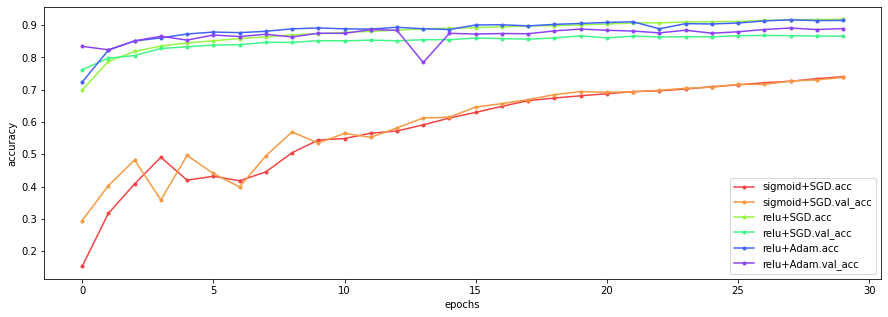

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h1.history['acc'], label='sigmoid+SGD.acc', c = '#F54242', marker='.')
plt.plot(h1.history['val_acc'], label='sigmoid+SGD.val_acc', c = '#F59942', marker='.')
plt.plot(h2.history['acc'], label='relu+SGD.acc', c = '#96F542', marker='.')
plt.plot(h2.history['val_acc'], label='relu+SGD.val_acc', c = '#42F587', marker='.')
plt.plot(h3.history['acc'], label='relu+Adam.acc', c = '#4263F5', marker='.')
plt.plot(h3.history['val_acc'], label='relu+Adam.val_acc', c = '#8D42F5', marker='.')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 최적화 모델 찾기
- 모델체크포인트(ModelCheckPoint) : 모델을 저장해주는 기능
- 얼리스탑핑(EarlyStopping) : 조기학습 중단 기능(시간낭비를 방지, 과대적합)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 1. 모델 저장
# 저장경로 및 파일명 형태를 설정
save_path = '/content/drive/MyDrive/인공지능 12회차/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d(digit) : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(001,002,003 ...) 
# f(float) : 실수(소수점) 형태 .4 -> 소수점 4자리까지 형태의 자리수(0.001, 0.002, 0.003 ...)
# hdf5 : 모델이 저장되는 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,   # 파일 경로 설정
                         monitor = 'val_acc',    # 해당값을 기준으로 파일을 저장
                         save_best_only = True,  # monitor값이 가장 최고점이거나 최저점을 갱신했을 경우 모델을 저장
                         mode = 'max',           # save_best_only = True일 경우 모니터링 하는 값의 최대, 최소를 결정
                         verbose = 1             # 모델 개선 및 저장 메시지 표시
                         )

In [ ]:
# 2 조기 학습 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        patience = 3
                        )
# 모델 학습시 val_acc가 3번의 epoch를 돌 동안 값이 개선되지 않으면 학습을 중단시켜 주세요! patience의 의미.

In [ ]:
model4 = Sequential()
#입력층 모델3
model4.add(Flatten(input_shape =(28,28)))

#3.중간층 활성화함수 : relu, 최적화함수 : Adam
model4.add(Dense(450,activation='relu'))
model4.add(Dense(200,activation='relu'))
model4.add(Dense(150,activation='relu'))
model4.add(Dense(50,activation='relu'))
# 출력층 모델3
model4.add(Dense(10, activation ='softmax')) # 활성화함수

model4.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', # 최적화함수 : adam
              metrics = ['acc']) # 평가방법 설정 : 정확도

h4 = model4.fit(X_train, y_train_one_hot,
                validation_split=0.2,
                epochs =30,
                batch_size=128,
                callbacks=[f_mckp, f_early]) # 모델체크포인트, 얼리스탑핑 설정

Epoch 1/30
368/375 [============================>.] - ETA: 0s - loss: 2.3679 - acc: 0.7541
Epoch 1: val_acc improved from -inf to 0.81108, saving model to /content/drive/MyDrive/인공지능 12회차/model/FashionModel_001_0.8111.hdf5
375/375 [==============================] - 2s 4ms/step - loss: 2.3356 - acc: 0.7551 - val_loss: 0.6309 - val_acc: 0.8111
Epoch 2/30
359/375 [===========================>..] - ETA: 0s - loss: 0.5180 - acc: 0.8325
Epoch 2: val_acc improved from 0.81108 to 0.83467, saving model to /content/drive/MyDrive/인공지능 12회차/model/FashionModel_002_0.8347.hdf5
375/375 [==============================] - 2s 4ms/step - loss: 0.5177 - acc: 0.8325 - val_loss: 0.5365 - val_acc: 0.8347
Epoch 3/30
369/375 [============================>.] - ETA: 0s - loss: 0.4269 - acc: 0.8507
Epoch 3: val_acc did not improve from 0.83467
375/375 [==============================] - 1s 4ms/step - loss: 0.4268 - acc: 0.8507 - val_loss: 0.4938 - val_acc: 0.8292
Epoch 4/30
360/375 [=============

- 저장된 모델 불러오기 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_model = load_model('/content/drive/MyDrive/인공지능 12회차/model/FashionModel_006_0.8675.hdf5')

In [ ]:
best_model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.4009 - acc: 0.8594


[0.4009128510951996, 0.8593999743461609]